In [19]:
# raster to geodataframe #

import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.features import geometry_mask
from rasterio.mask import mask
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import xarray as xr
import rioxarray as rxr

# path for output
outputPath = r"C:/Users/jtrum/Desktop/wb_outputs"
os.chdir(r'C:/Users/jtrum/world_bank/data/')
aoi = gpd.read_file('aoiLuanda.geojson')

Fathom  
**IHME (access to improved water sources)**  
**IHME (access to improved sanitation)**  
**IHME (reliance on open defecation)**  
HDSL (children)  
HDSL (elderly)  
HDSL (women of reproductive age)  
**WSF 2019 (built-up area)**  

### IHME (water)

In [90]:
improved_water_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_W_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif")
improved_water_sources = improved_water_sources.squeeze().drop(labels="band")
improved_water_sources = improved_water_sources.rename({"x":"longitude", "y":"latitude"})
#convert to geodataframe
improved_water_sources = improved_water_sources.to_dataframe(name="pct")
#turn latitude and longitude into columns
improved_water_sources.reset_index(inplace=True)
improved_water_sources_gdf = gpd.GeoDataFrame(improved_water_sources, geometry=gpd.points_from_xy(improved_water_sources.longitude, improved_water_sources.latitude))
improved_water_sources_gdf.set_crs(epsg=4326, inplace=True)
improved_water_sources_gdf_aoi = gpd.clip(improved_water_sources_gdf, aoi)
improved_water_sources_gdf_aoi.to_file(os.path.join(outputPath, "improved_water_sources_gdf_aoi.geojson"))
print("File saved to improved_water_sources_gdf_aoi.geojson")
improved_water_sources_gdf_aoi

C:\Users\jtrum\AppData\Local\Temp\ipykernel_17780\2764959518.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  improved_water_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_W_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif")


File saved to improved_water_sources_gdf_aoi.geojson


,latitude,longitude,pct,geometry
9977647,-9.312501,13.187516,33.094032,POINT (13.18752 -9.31250)
9977646,-9.312501,13.145849,37.536205,POINT (13.14585 -9.31250)
9971036,-9.270834,13.145849,36.304882,POINT (13.14585 -9.27083)
9971037,-9.270834,13.187516,36.074020,POINT (13.18752 -9.27083)
9964425,-9.229168,13.104183,32.597126,POINT (13.10418 -9.22917)
...,...,...,...,...
9885114,-8.729168,13.479183,99.981781,POINT (13.47918 -8.72917)
9885116,-8.729168,13.562516,98.460533,POINT (13.56252 -8.72917)
9878503,-8.687501,13.437516,99.396202,POINT (13.43752 -8.68750)
9878505,-8.687501,13.520849,96.345879,POINT (13.52085 -8.68750)


In [ ]:
improved_water_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_W_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif")
improved_water_sources = improved_water_sources.squeeze().drop(labels="band")
improved_water_sources = improved_water_sources.rename({"x":"longitude", "y":"latitude"})
#convert to geodataframe
improved_water_sources = improved_water_sources.to_dataframe(name="pct")
#turn latitude and longitude into columns
improved_water_sources.reset_index(inplace=True)
improved_water_sources_gdf = gpd.GeoDataFrame(improved_water_sources, geometry=gpd.points_from_xy(improved_water_sources.longitude, improved_water_sources.latitude))
improved_water_sources_gdf.set_crs(epsg=4326, inplace=True)
improved_water_sources_gdf_aoi = gpd.clip(improved_water_sources_gdf, aoi)
improved_water_sources_gdf_aoi.to_file(os.path.join(outputPath, "improved_water_sources_gdf_aoi.geojson"))
print("File saved to improved_water_sources_gdf_aoi.geojson")
improved_water_sources_gdf_aoi

### IHME (sanitation)

In [3]:
improved_sanitation_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_S_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif")
improved_sanitation_sources = improved_sanitation_sources.squeeze().drop(labels="band")
improved_sanitation_sources = improved_sanitation_sources.rename({"x":"longitude", "y":"latitude"})
#convert to geodataframe
improved_sanitation_sources = improved_sanitation_sources.to_dataframe(name="pct")
#turn latitude and longitude into columns
improved_sanitation_sources.reset_index(inplace=True)
improved_sanitation_sources_gdf = gpd.GeoDataFrame(improved_sanitation_sources, geometry=gpd.points_from_xy(improved_sanitation_sources.longitude, improved_sanitation_sources.latitude))
improved_sanitation_sources_gdf.set_crs(epsg=4326, inplace=True)
improved_sanitation_sources_gdf_aoi = gpd.clip(improved_sanitation_sources_gdf, aoi)
improved_sanitation_sources_gdf_aoi.to_file(os.path.join(outputPath, "improved_sanitation_sources_gdf_aoi.geojson"))
print("File saved to improved_sanitation_sources_gdf_aoi.geojson")
improved_sanitation_sources_gdf_aoi = improved_sanitation_sources_gdf_aoi[['pct', 'geometry']]

C:\Users\jtrum\AppData\Local\Temp\ipykernel_5004\2086645591.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  improved_sanitation_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_S_IMP_PERCENT_MEAN_2017_Y2020M06D02.tif")


File saved to improved_sanitation_sources_gdf_aoi.geojson


### IHME (open defacation)

In [7]:
open_def_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_S_OD_PERCENT_MEAN_2017_Y2020M06D02.tif")
open_def_sources = open_def_sources.squeeze().drop(labels="band")
open_def_sources = open_def_sources.rename({"x":"longitude", "y":"latitude"})
#convert to geodataframe
open_def_sources = open_def_sources.to_dataframe(name="pct")
#turn latitude and longitude into columns
open_def_sources.reset_index(inplace=True)
open_def_sources_gdf = gpd.GeoDataFrame(open_def_sources, geometry=gpd.points_from_xy(open_def_sources.longitude, open_def_sources.latitude))
open_def_sources_gdf.set_crs(epsg=4326, inplace=True)
open_def_sources_gdf_aoi = gpd.clip(open_def_sources_gdf, aoi)
open_def_sources_gdf_aoi.to_file(os.path.join(outputPath, "open_def_sources_gdf_aoi.geojson"))
print("File saved to open_def_sources_gdf_aoi.geojson")
open_def_sources_gdf_aoi = open_def_sources_gdf_aoi[['pct', 'geometry']]
open_def_sources_gdf_aoi

C:\Users\jtrum\AppData\Local\Temp\ipykernel_5004\4003020799.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  open_def_sources = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/IHME_LMIC_WASH_2000_2017_S_OD_PERCENT_MEAN_2017_Y2020M06D02.tif")


File saved to open_def_sources_gdf_aoi.geojson


,pct,geometry
9977647,28.999447,POINT (13.18752 -9.31250)
9977646,21.648537,POINT (13.14585 -9.31250)
9971036,26.851372,POINT (13.14585 -9.27083)
9971037,27.775961,POINT (13.18752 -9.27083)
9964425,26.202843,POINT (13.10418 -9.22917)
...,...,...
9885114,24.031370,POINT (13.47918 -8.72917)
9885116,21.044580,POINT (13.56252 -8.72917)
9878503,26.772446,POINT (13.43752 -8.68750)
9878505,19.226595,POINT (13.52085 -8.68750)


### Children under 5

In [ ]:
raster = rxr.open_rasterio(r"C:/Users/jtrum/world_bank/data/ago_children_under_five_2020.tif")
clip_bound = aoi.geometry
clip_raster = raster.rio.clip(clip_bound, from_disk=True)
children_under_five = clip_raster.squeeze().drop(labels="band")
children_under_five = children_under_five.rename({"x":"longitude", "y":"latitude"})
children_under_five = children_under_five.to_dataframe(name="pct")
children_under_five = children_under_five.reset_index()
children_under_five_gdf = gpd.GeoDataFrame(children_under_five, geometry=gpd.points_from_xy(children_under_five.longitude, children_under_five.latitude))
children_under_five_gdf.set_crs(epsg=4326, inplace=True)
children_under_five_gdf_aoi = gpd.clip(children_under_five_gdf, aoi)
children_under_five_gdf_aoi.dropna(inplace=True)
children_under_five_gdf_aoi[['pct', 'geometry']]
children_under_five_gdf_aoi.to_file(os.path.join(outputPath, "children_under_five_gdf_aoi.geojson"))

### Elderly

In [34]:
raster = rxr.open_rasterio(r"C:/Users/jtrum/world_bank/data/ago_elderly_60_plus_2020.tif")
clip_bound = aoi.geometry
clip_raster = raster.rio.clip(clip_bound, from_disk=True)
children_under_five = clip_raster.squeeze().drop(labels="band")
children_under_five = children_under_five.rename({"x":"longitude", "y":"latitude"})
children_under_five = children_under_five.to_dataframe(name="pct")
children_under_five = children_under_five.reset_index()
children_under_five_gdf = gpd.GeoDataFrame(children_under_five, geometry=gpd.points_from_xy(children_under_five.longitude, children_under_five.latitude))
children_under_five_gdf.set_crs(epsg=4326, inplace=True)
children_under_five_gdf_aoi = gpd.clip(children_under_five_gdf, aoi)
children_under_five_gdf_aoi.dropna(inplace=True)
children_under_five_gdf_aoi[['pct', 'geometry']]
children_under_five_gdf_aoi.to_file(os.path.join(outputPath, "elderly_over_60_gdf_aoi.geojson"))

C:\Users\jtrum\AppData\Local\Temp\ipykernel_5004\150416882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_under_five_gdf_aoi.dropna(inplace=True)


### Women

In [37]:
raster = rxr.open_rasterio(r"C:/Users/jtrum/world_bank/data/ago_women_of_reproductive_age_15_49_2020.tif")
clip_bound = aoi.geometry
clip_raster = raster.rio.clip(clip_bound, from_disk=True)
children_under_five = clip_raster.squeeze().drop(labels="band")
children_under_five = children_under_five.rename({"x":"longitude", "y":"latitude"})
children_under_five = children_under_five.to_dataframe(name="pct")
children_under_five = children_under_five.reset_index()
children_under_five_gdf = gpd.GeoDataFrame(children_under_five, geometry=gpd.points_from_xy(children_under_five.longitude, children_under_five.latitude))
children_under_five_gdf.set_crs(epsg=4326, inplace=True)
children_under_five_gdf_aoi = gpd.clip(children_under_five_gdf, aoi)
children_under_five_gdf_aoi.dropna(inplace=True)
children_under_five_gdf_aoi[['pct', 'geometry']]
children_under_five_gdf_aoi.to_file(os.path.join(outputPath, "women_reproductive_age_gdf_aoi.geojson"))

C:\Users\jtrum\AppData\Local\Temp\ipykernel_5004\2577157081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children_under_five_gdf_aoi.dropna(inplace=True)


<Axes: >

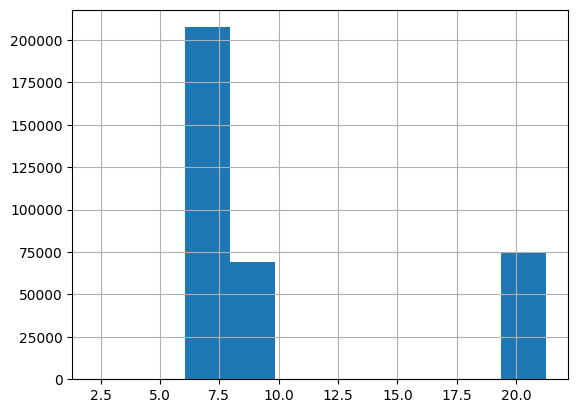

In [38]:
children_under_five_gdf_aoi['pct'].hist()

In [39]:
len(children_under_five_gdf_aoi)

351877

### WSF 2019

In [12]:
#open wsf2019 raster
built_up_area = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/wsf2019.tif")
built_up_area = built_up_area.squeeze().drop(labels="band")
built_up_area = built_up_area.rename({"x":"longitude", "y":"latitude"})
built_up_area

In [16]:
import numpy as np

# Assuming 'built_up_area' is the raster you want to crop
built_up_area_data = built_up_area.read(1)  # Read the raster data

# Apply the mask to the raster data
cropped_raster_data = np.ma.masked_array(built_up_area_data, mask)

# Create a new rasterio dataset with the cropped data
cropped_raster = rio.open(
    "C:/Users/jtrum/Desktop/wb_outputs/cropped_wsf2019.tif",
    "w",
    driver="GTiff",
    height=cropped_raster_data.shape[0],
    width=cropped_raster_data.shape[1],
    count=1,  # Assuming a single band raster
    dtype=str(cropped_raster_data.dtype),
    crs=built_up_area.crs,
    transform=built_up_area.transform,
)

# Write the cropped data to the new raster dataset
cropped_raster.write(cropped_raster_data.filled(fill_value=0), 1)  # Fill masked values with 0 or another suitable value
cropped_raster.close()


In [26]:
built_up_area = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/wsf2019.tif")
built_up_area = built_up_area.squeeze().drop(labels="band")
built_up_area = built_up_area.rename({"x":"longitude", "y":"latitude"})
built_up_area

C:\Users\jtrum\AppData\Local\Temp\ipykernel_17780\1584535359.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  built_up_area = xr.open_rasterio(r"C:/Users/jtrum/world_bank/data/wsf2019.tif")


<xarray.DataArray (latitude: 22487, longitude: 22487)>
[505665169 values with dtype=uint8]
Coordinates:
  * latitude   (latitude) float64 -7.99 -7.99 -7.99 ... -10.01 -10.01 -10.01
  * longitude  (longitude) float64 11.99 11.99 11.99 11.99 ... 14.01 14.01 14.01
Attributes:
    transform:      (8.983152841195215e-05, 0.0, 11.989993760200077, 0.0, -8....
    crs:            +proj=longlat +datum=WGS84 +no_defs=True
    res:            (8.983152841195215e-05, 8.983152841195215e-05)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [27]:
#convert to geodataframe
built_up_area = built_up_area.to_dataframe(name="built_up_area")

In [28]:
#drop zero values
built_up_area_255 = built_up_area[built_up_area.built_up_area != 0]
built_up_area_0 = built_up_area[built_up_area.built_up_area == 0]
built_up_area_255

built_up_area
latitude   longitude               
-7.990020  13.464713            255
           13.464803            255
           13.464893            255
           13.464983            255
           13.465072            255
...                             ...
-10.007726 12.498485            255
           12.498575            255
           12.630268            255
           12.630358            255
           12.630448            255

[49377713 rows x 1 columns]

In [29]:
#turn latitude and longitude into columns
built_up_area_255.reset_index(inplace=True)
built_up_area_255

,latitude,longitude,built_up_area
0,-7.990020,13.464713,255
1,-7.990020,13.464803,255
2,-7.990020,13.464893,255
3,-7.990020,13.464983,255
4,-7.990020,13.465072,255
...,...,...,...
49377708,-10.007726,12.498485,255
49377709,-10.007726,12.498575,255
49377710,-10.007726,12.630268,255
49377711,-10.007726,12.630358,255


In [42]:
built_up_area_255_gdf = gpd.GeoDataFrame(built_up_area_255, geometry=gpd.points_from_xy(built_up_area_255.longitude, built_up_area_255.latitude))

In [43]:
built_up_area_255_gdf['built'] = "True"
built_up_area_255_gdf = built_up_area_255_gdf.drop(columns=['built_up_area', 'latitude', 'longitude'])
built_up_area_255_gdf

,geometry,built
0,POINT (13.46471 -7.99002),True
1,POINT (13.46480 -7.99002),True
2,POINT (13.46489 -7.99002),True
3,POINT (13.46498 -7.99002),True
4,POINT (13.46507 -7.99002),True
...,...,...
49377708,POINT (12.49849 -10.00773),True
49377709,POINT (12.49857 -10.00773),True
49377710,POINT (12.63027 -10.00773),True
49377711,POINT (12.63036 -10.00773),True


In [44]:
#set up built_up_are_255_gdf to crs of aoi
built_up_area_255_gdf = built_up_area_255_gdf.set_crs(epsg=4326)

In [40]:
built_up_area_255_gdf

,geometry,built
0,POINT (-7.99002 13.46471),True
1,POINT (-7.99002 13.46480),True
2,POINT (-7.99002 13.46489),True
3,POINT (-7.99002 13.46498),True
4,POINT (-7.99002 13.46507),True
...,...,...
49377708,POINT (-10.00773 12.49849),True
49377709,POINT (-10.00773 12.49857),True
49377710,POINT (-10.00773 12.63027),True
49377711,POINT (-10.00773 12.63036),True


In [41]:
aoi

,NAME_1,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC,"MULTIPOLYGON (((13.01919 -9.02194, 13.02049 -9..."


In [45]:
#only keep points within aoi
built_up_area_255_gdf_aoi = gpd.sjoin(built_up_area_255_gdf, aoi, how="inner", op='intersects')

c:\Users\jtrum\miniconda3\envs\wash\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [46]:
print(len(built_up_area_255_gdf_aoi))

5539893


In [47]:
built_up_area_255_gdf_aoi

,geometry,built,index_right,NAME_1,GID_0,COUNTRY,GID_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
15924125,POINT (13.41441 -8.63807),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
16025943,POINT (13.41522 -8.63968),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
16025944,POINT (13.41531 -8.63968),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
16025945,POINT (13.41540 -8.63968),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
16031698,POINT (13.41522 -8.63977),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886381,POINT (13.15426 -9.34297),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
48886382,POINT (13.15435 -9.34297),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
48886383,POINT (13.15443 -9.34297),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC
48886384,POINT (13.15452 -9.34297),True,0,Luanda,AGO,Angola,AGO.11_1,NA,AGO.11.1_1,Cacuaco,NA,NA,Município,Municpality|City Council,1108,AO.LU.CC


In [48]:
#export as geojson to output folder
built_up_area_255_gdf_aoi.to_file(r"C:/Users/jtrum/Desktop/wb_outputs/built_up_area_255_gdf_aoi.geojson", driver='GeoJSON')